In [47]:
# Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


In [48]:
df = pd.read_csv("/content/Churn_Modelling.csv", index_col=0)
df.columns = map(str.lower, df.columns)

In [49]:
df.head()


,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.shape


(10000, 13)

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [52]:
# The average of the age variable was taken according to the dependent variable.
df.groupby("exited").agg("mean")

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
exited,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [53]:
df.groupby("gender").agg({"age": "mean"})


,age
gender,
Female,39.238389
Male,38.658237


In [54]:
df.groupby("gender").agg({"exited": "mean"})


,exited
gender,
Female,0.250715
Male,0.164559


In [55]:
df.groupby("geography").agg({"exited": "mean"})


,exited
geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [56]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.
df.corr()


,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
customerid,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


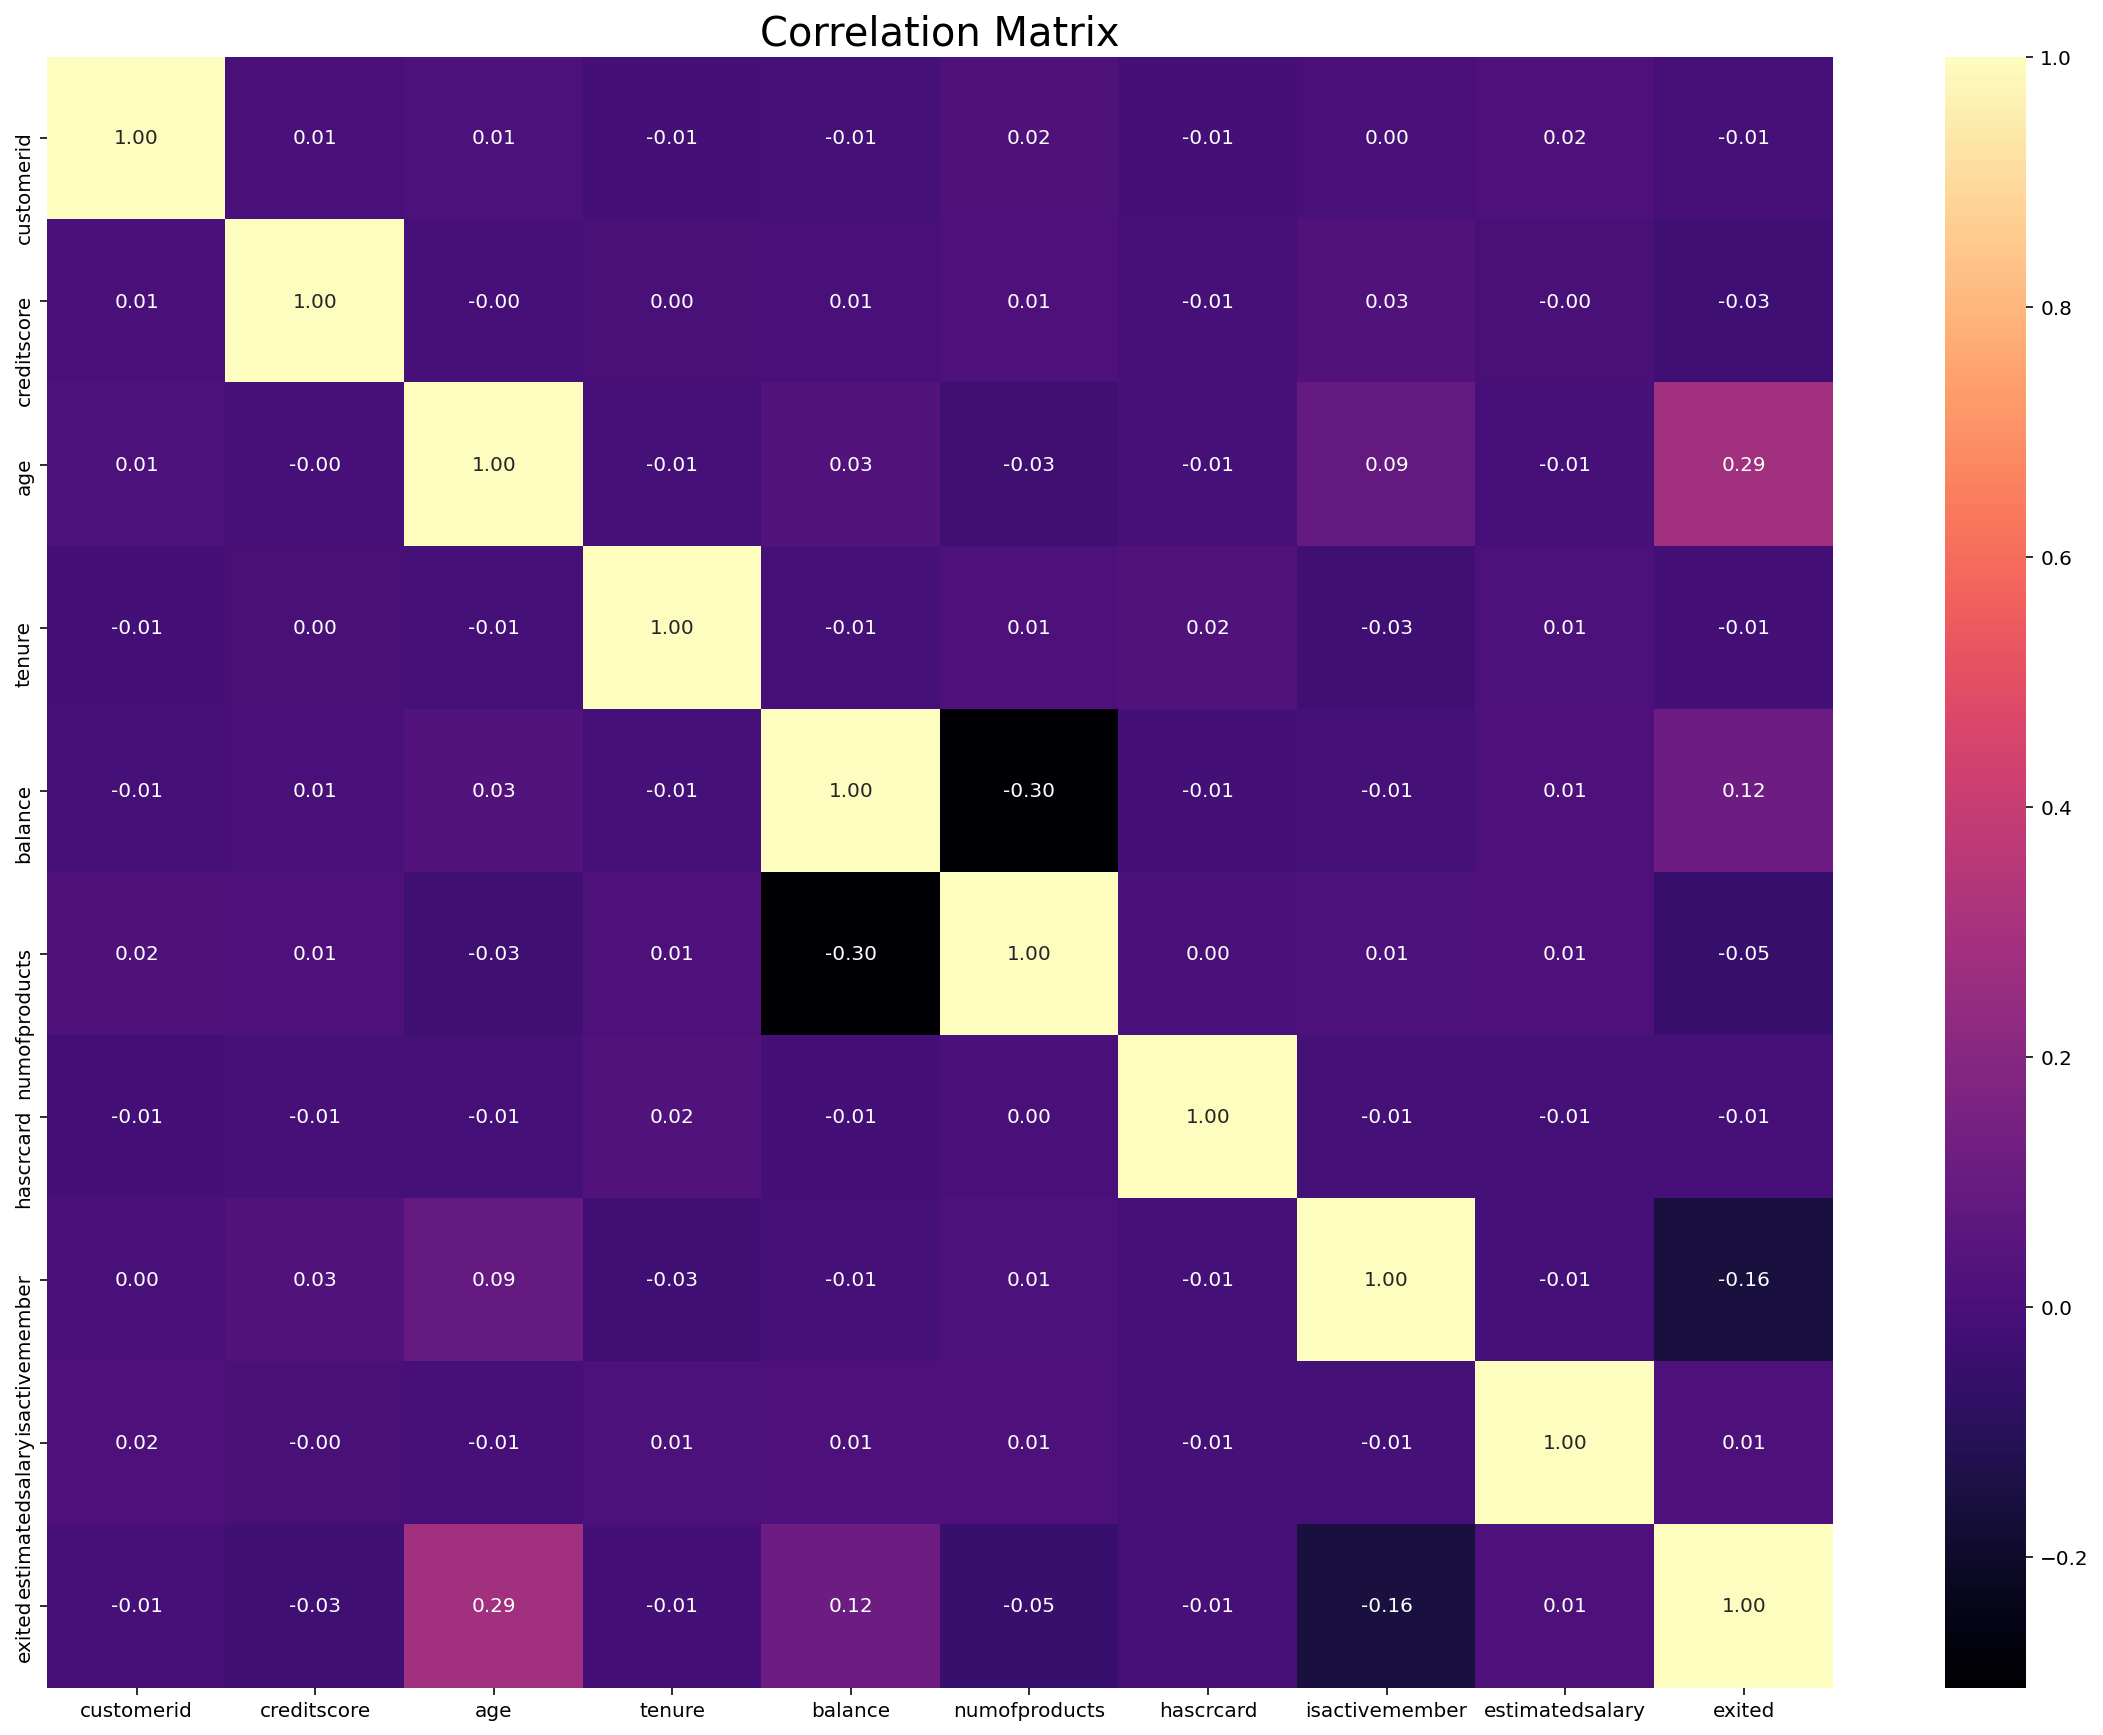

In [57]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Data Preprocessing

Outlier and Missing value detection

In [58]:
# There are no null values
df.isnull().sum()

customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [59]:
# Outlier Observation Analysis
for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


In [60]:
df = pd.get_dummies(df, columns =["geography", "gender"], drop_first = False)


In [61]:
df.head()


,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [62]:
df = df.drop(["customerid","surname"], axis = 1)


In [63]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Scaling

In [64]:
cat_df = df[["geography_Germany", "geography_Spain", "geography_France", "gender_Male", "gender_Female", "hascrcard","isactivemember"]]

In [65]:
cat_df.head()


,geography_Germany,geography_Spain,geography_France,gender_Male,gender_Female,hascrcard,isactivemember
RowNumber,,,,,,,
1,0,0,1,0,1,1,1
2,0,1,0,0,1,0,1
3,0,0,1,0,1,1,0
4,0,0,1,0,1,0,0
5,0,1,0,0,1,1,1


In [66]:
cat_df.head()


,geography_Germany,geography_Spain,geography_France,gender_Male,gender_Female,hascrcard,isactivemember
RowNumber,,,,,,,
1,0,0,1,0,1,1,1
2,0,1,0,0,1,0,1
3,0,0,1,0,1,1,0
4,0,0,1,0,1,0,0
5,0,1,0,0,1,1,1


In [67]:
y = df["exited"]
X = df.drop(["exited","geography_Germany", "geography_Spain", "geography_France", "gender_Male", "gender_Female", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index


In [68]:
X.head()    


,creditscore,age,tenure,balance,numofproducts,estimatedsalary
RowNumber,,,,,,
1,619,42,2,0.00,1,101348.88
2,608,41,1,83807.86,1,112542.58
3,502,42,8,159660.80,3,113931.57
4,699,39,1,0.00,2,93826.63
5,850,43,2,125510.82,1,79084.10


In [69]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [70]:
X = pd.concat([X,cat_df], axis = 1)


In [71]:
X.head()


,creditscore,age,tenure,balance,numofproducts,estimatedsalary,geography_Germany,geography_Spain,geography_France,gender_Male,gender_Female,hascrcard,isactivemember
RowNumber,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0,0,1,0,1,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0,1,0,0,1,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0,0,1,0,1,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0,0,1,0,1,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0,1,0,0,1,1,1


In [72]:
print(X.shape, y.shape)


(10000, 13) (10000,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

In [74]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8000, 13) (2000, 13) (8000,) (2000,)


In [75]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))

# evaluate each model in turn
results = []
names = []

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [77]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = confusion_matrix(y_test, y_pred)
        score = accuracy_score(y_test, y_pred)
        print(accuracy)
        print(score)


[[1515   58]
 [ 344   83]]
0.799
[[1487   86]
 [ 264  163]]
0.825
[[1541   32]
 [ 283  144]]
0.8425
